In [1]:
import numpy as np
from DensityCanvas import DensityCanvas
from Lattice import Lattice
from norms import Lp_norm, Lp_distance, KL_distance, JS_distance

# Intro
A density canvas is intended as a class to strandardize the way we work with densities.<br>
It is essentially a 2d canvas where we can define a scalar density function.<br>
It is supposed to automatize certain recurring operations: generating sum of gaussians, performing arithmetic operations between two densities, calculating norms, embedding registers, calculating QUBO coefficients, and more.<br>
This notebook presents the functionalities implemented so far.  


## Creating a canvas
To create a canvas, you need to supply:
1. An origin (coordinates of the bottom left corner)
2. The length in X and Y direction (as two separate variables)
3. The resolution in X and Y direction (as two separate variables)

In [2]:
# this creates an empty canvas representing a 40x40 region, composed of 1200x1200=1440000 points
canvas = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )

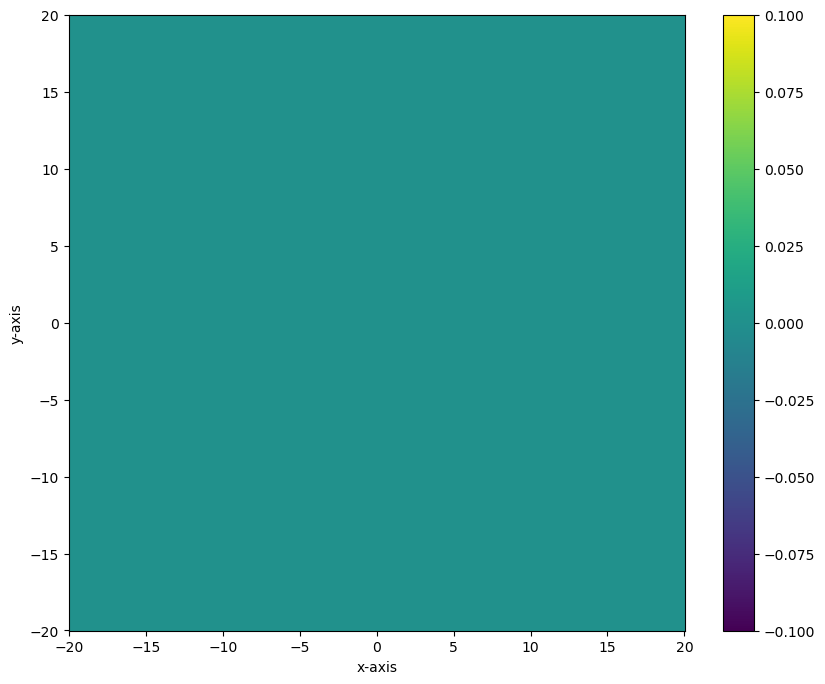

In [3]:
# a canvas can be drawn, but at first it's just empty so it's just a flat 2d plot that is 0 everywhere
canvas.draw()

## Defining a density
You can define a density to put in a canvas. For now you can either pass an existing density (as a numpy array) that you got from somewhere else, or you can define it as a sum of Gaussians. To define a density as a sum of Gaussians you need to provide:
1. The centers of the Gaussians (as a list of coordinates)
2. The variance of the Gaussians (as a single number)
3. the amplitude of the gaussians (as a single number) 

In [4]:
# define centers, variances, amplitudes
centers = np.array([[0,0], [5,5], [-3,-3]])
variance = 1
amplitude = 10

# assign the density to the canvas
canvas.set_density_from_gaussians(
    centers=centers,
    amplitude=amplitude,
    variance=variance
)

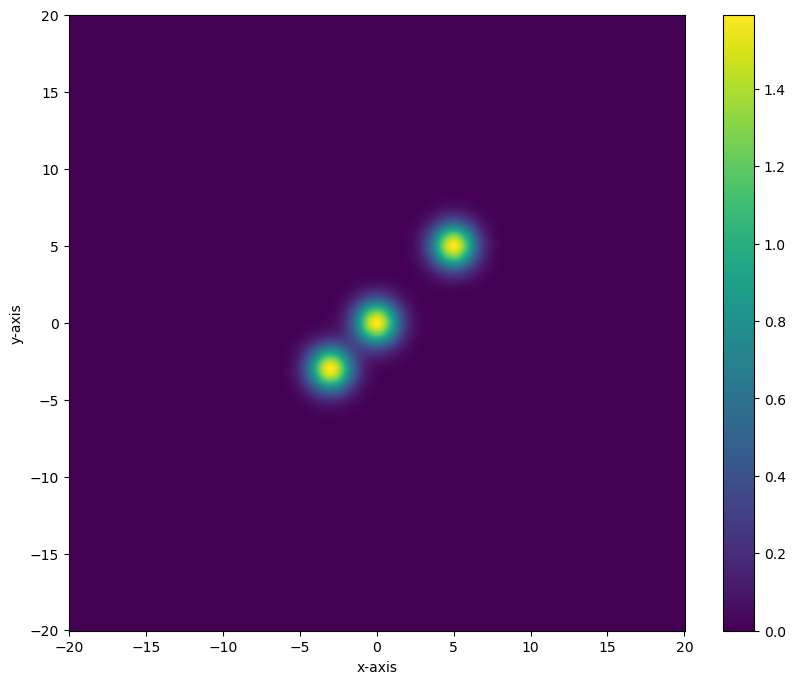

In [5]:
# now you can plot it again to see the Gaussians

canvas.draw()

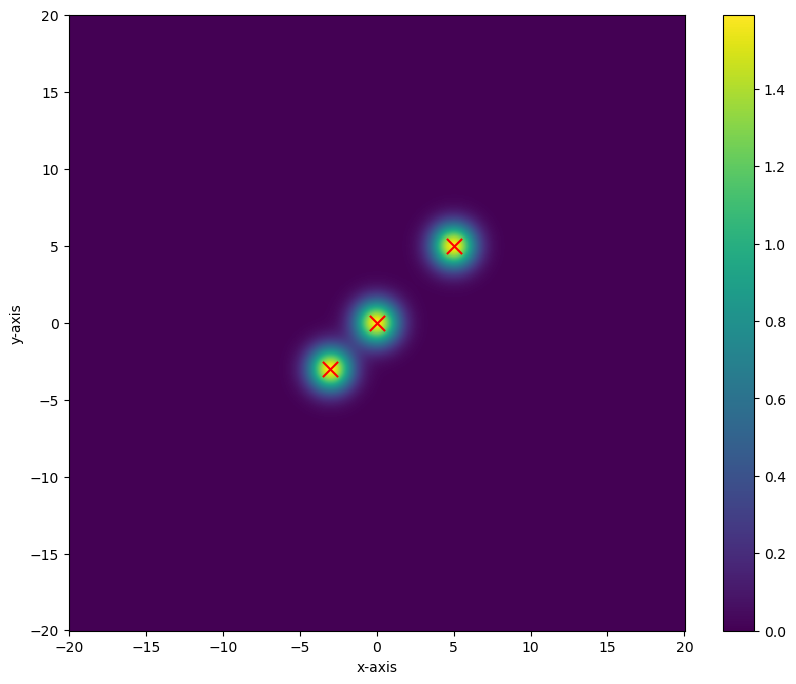

In [6]:
# you can also choose to display the center of the Gaussians as red crosses
canvas.draw(draw_centers=True)

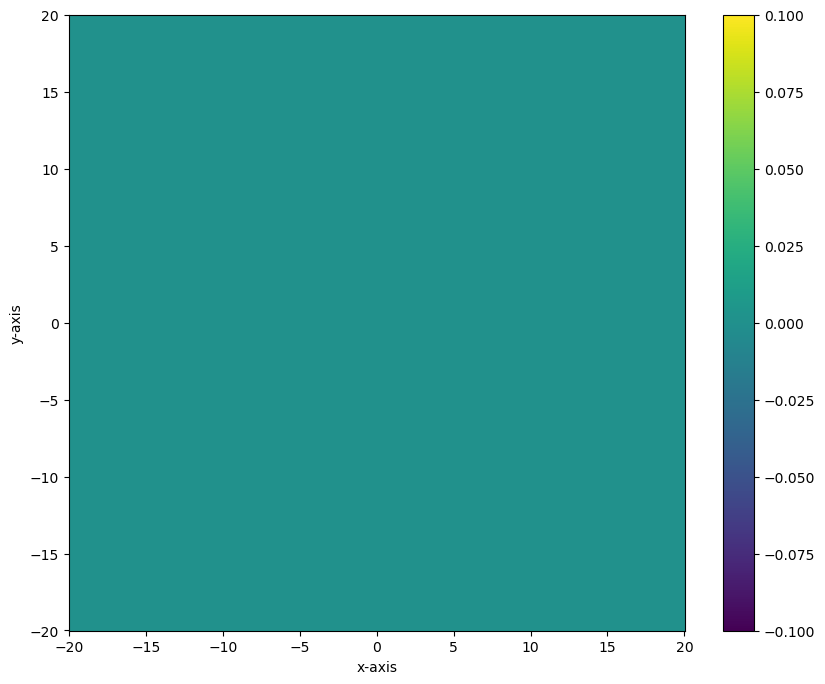

In [7]:
# if you wish, you can delete every density related info from a canvas.
# plotting it will return an empty one.

canvas.clear_density()
canvas.draw()

## Arithmetic operations
You can perform binary arithmetic operations with canvases:
1. sum and difference (element-wise sum/difference between the densities)
2. product of two canvases (element-wise product between the two densities)
3. product between a number and a canvas (multiply density by a fixed value)
4. Taking powers of a canvas (element-wise power of density)

In order for the operations to be well defined, the two canvases need to be built with the same parameters (same origin, same length, same resolution)

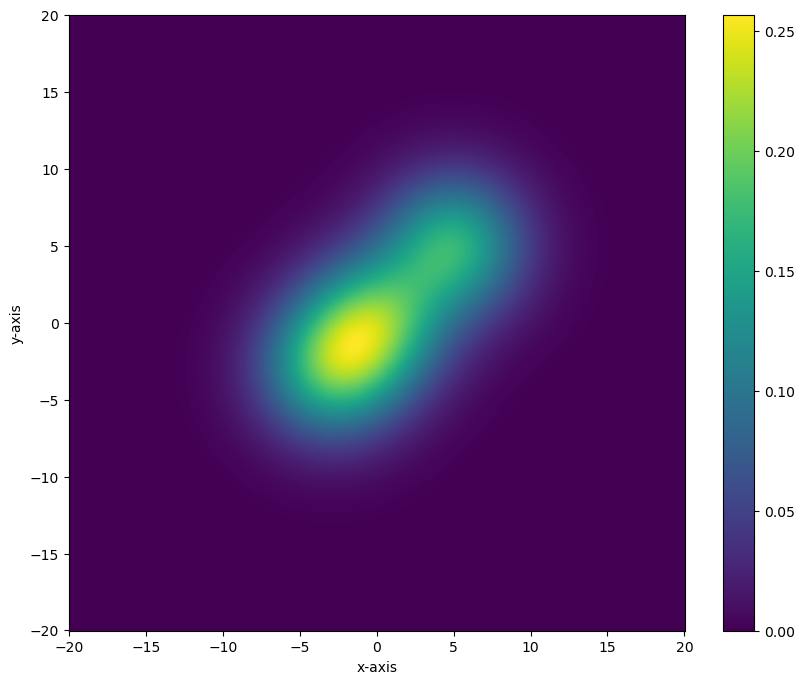

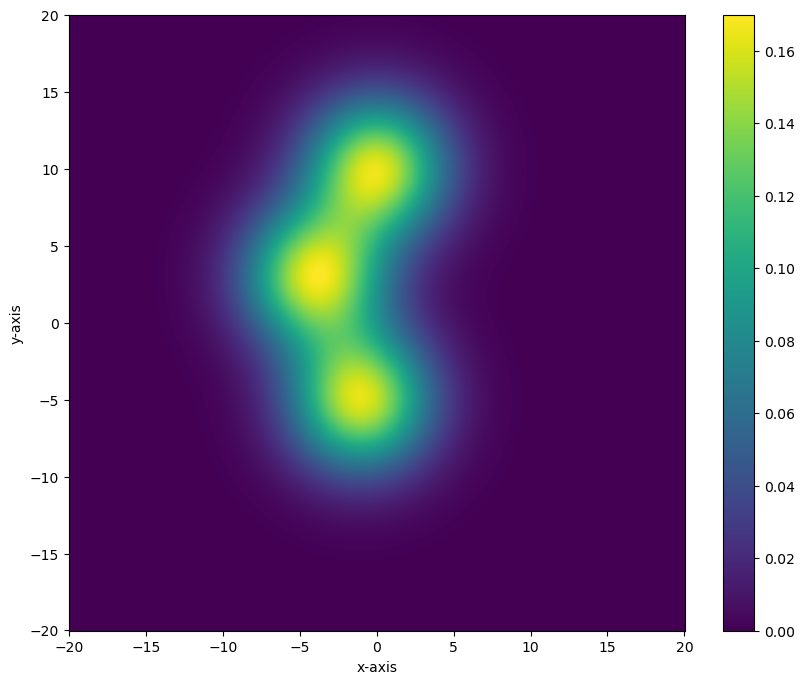

In [8]:
# define two test canvases

canvas1 = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )

canvas2 = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=1200,
    npoints_y=1200,
    )


centers1 = np.array([[0,0], [5,5], [-3,-3]])
centers2 = np.array([[0,10], [-4,3], [-1,-5]])
variance = 10
amplitude = 10

canvas1.set_density_from_gaussians(centers1, amplitude, variance)
canvas2.set_density_from_gaussians(centers2, amplitude, variance)

canvas1.draw()
canvas2.draw()


In [9]:
# sum
sum_canvas = canvas1 + canvas2

# difference
diff_canvas = canvas1 - canvas2

# canvas product
prod_canvas = canvas1*canvas2

# scalar product
scal_prod_canvas = 5*canvas1

# power
pow_canvas = canvas1**4

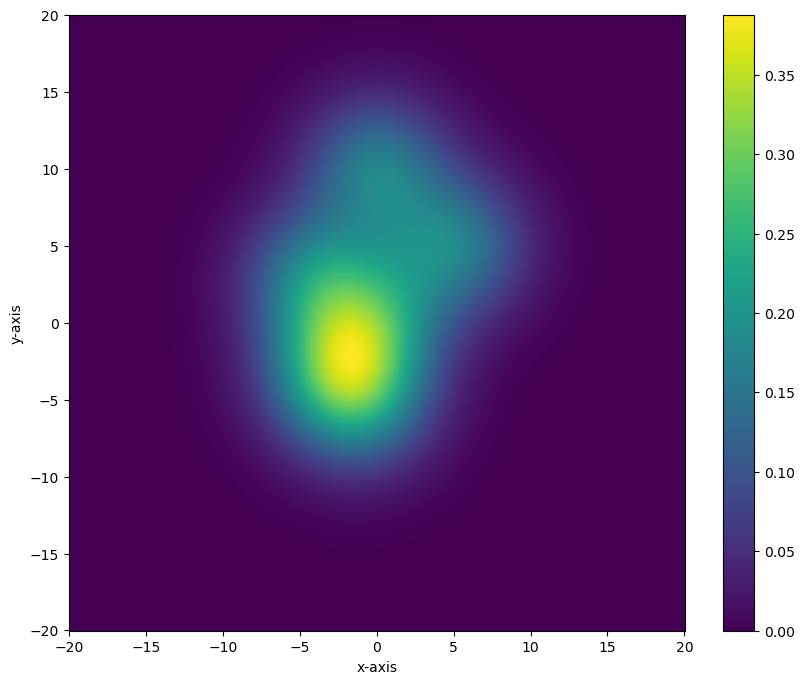

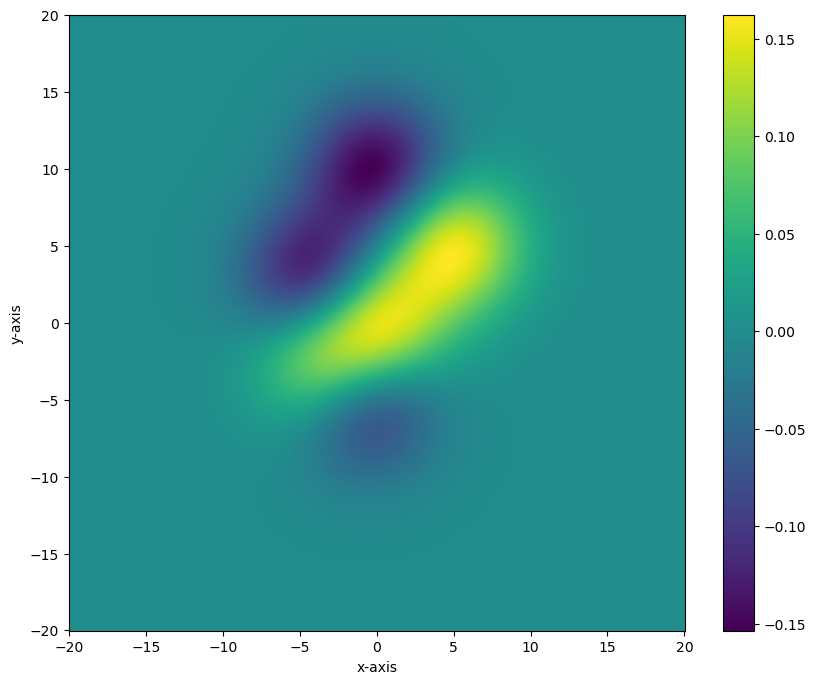

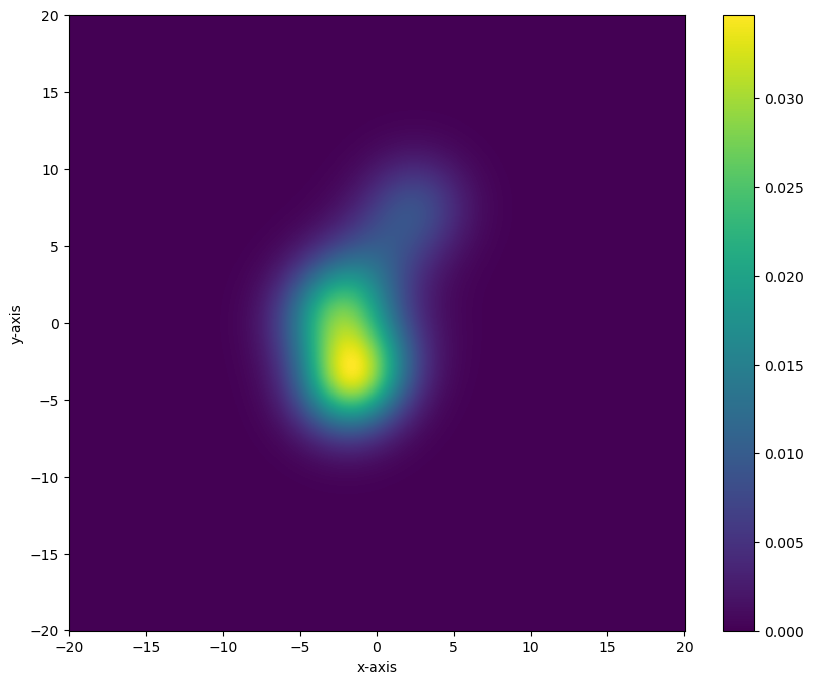

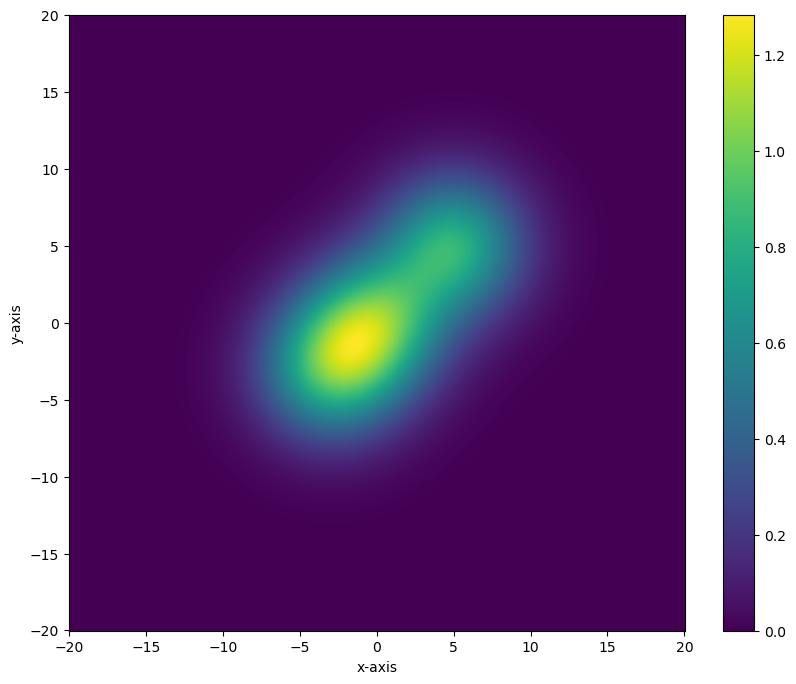

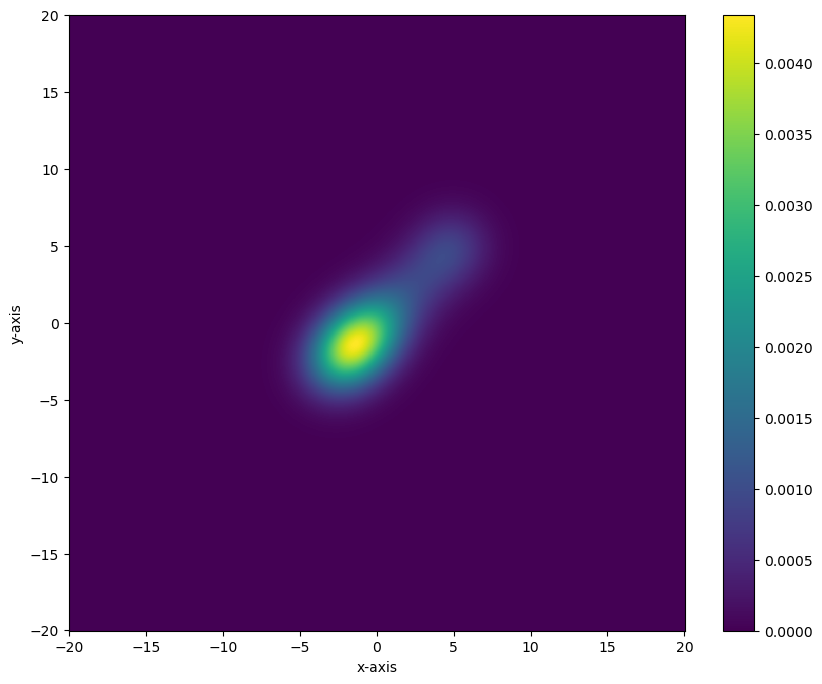

In [10]:
#visualize
sum_canvas.draw()
diff_canvas.draw()
prod_canvas.draw()
scal_prod_canvas.draw()
pow_canvas.draw()

## Integral

It is possible to integrate a canvas (meaning taking the integral of the density in the whole region)

In [11]:
# to integrate, either call integrate()
print(canvas1.integrate())

# or cast a canvas to float
print(float(canvas1))

29.949999652270137
29.949999652270137


## Norms

It is possible to calculate the norm of a canvas (meaning calculating a functional norm of the density). <br>

In [12]:
# To calculate an Lp norm, choose the canvas and a p
print(
    Lp_norm(canvas1, p=2)
)

# To measure an Lp distance between two canvases, either call norm on the difference
print(
    Lp_norm(canvas1-canvas2, p=2)
)

# Or call Lp_distance
print(
    Lp_distance(canvas1, canvas2, p=2)
)

3.9164668640035525
2.416548771357445
2.416548771357445


In [13]:
# other distances are implemented: KL and JS
print(
    "KL between canvas1 and canvas2:", KL_distance(canvas1, canvas2)
)
print(
    "JS between canvas1 and canvas2:", JS_distance(canvas1, canvas2)
)

#observe that the KL is not symmetric, while JS is
print(
    "KL between canvas2 and canvas1:", KL_distance(canvas2, canvas1), "(non symmetric)"
)
print(
    "JS between canvas2 and canvas1:", JS_distance(canvas2, canvas1), "(symmetric)"
)


KL between canvas1 and canvas2: 25607.80255727414
JS between canvas1 and canvas2: 4992.835702792894
KL between canvas2 and canvas1: 30351.59225549393 (non symmetric)
JS between canvas2 and canvas1: 4992.835702792894 (symmetric)


## Lattices
The next step is to define a lattice on top of a density. <br>
It is possible to do so by either supplying a set of custom positions, or by creating a rectangular lattice with the helper function provided.<br>
The lattice can be drawn by specifying draw_lattice=True, and it is displayed as blue dots.

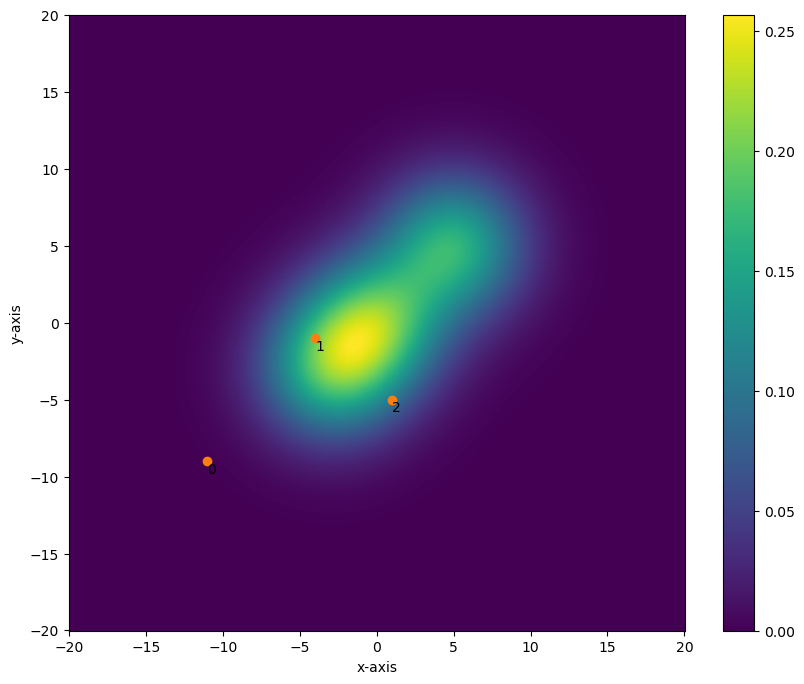

In [14]:
# define a lattice with custom positions
pos = [[-5,-5], [2,3], [7,-1]]
lattice = Lattice(pos)
canvas1.set_lattice(lattice)

# draw the canvas and lattice points (displayed as blue dots)
canvas1.draw(draw_lattice=True)

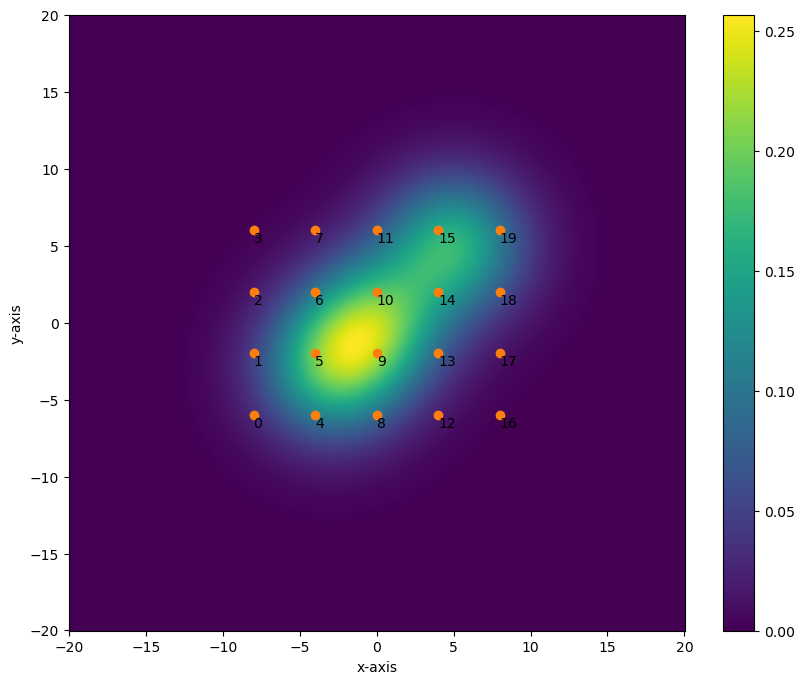

In [15]:
# define a 5x4 rectangular lattice with lattice spacing 4
rect_lattice = Lattice.rectangular(num_x=5, num_y=4, spacing=4)

canvas1.set_lattice(rect_lattice)
canvas1.draw(draw_lattice=True)

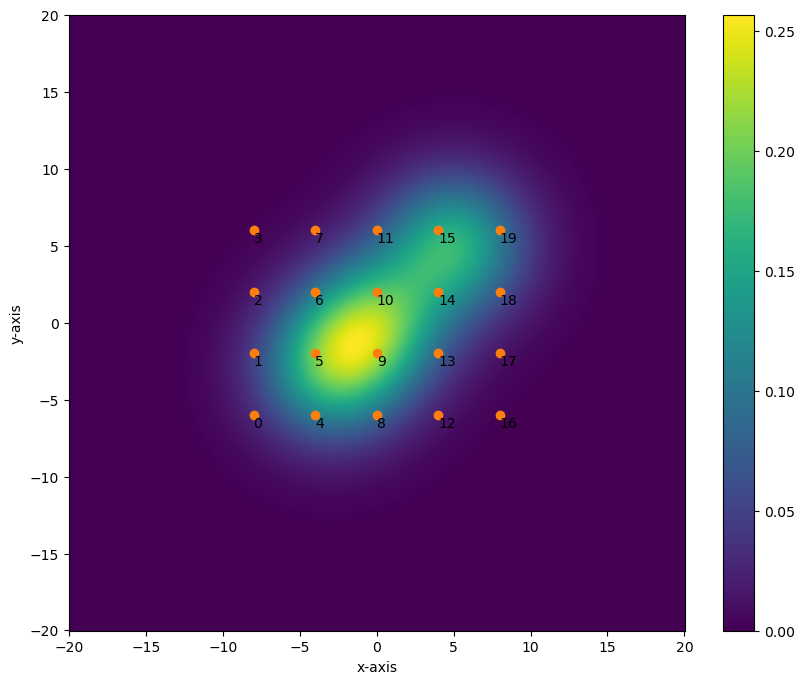

In [16]:
# Alternatively, you can call the rectangular lattice from the DensityCanvas class itself
canvas1.set_rectangular_lattice(num_x=5, num_y=4, spacing=4)

canvas1.draw(draw_lattice=True)

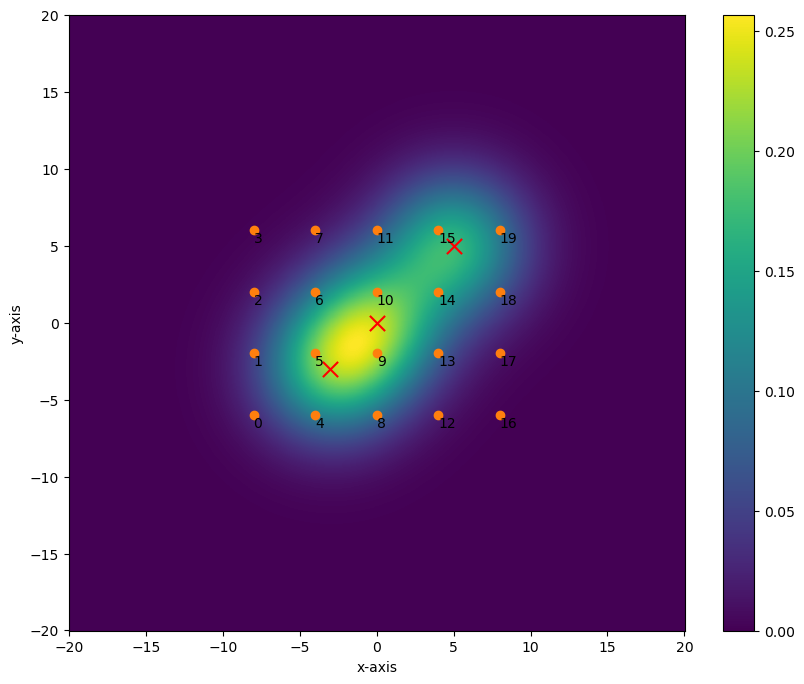

In [17]:
# lattice and gaussian centers can be displayed together
canvas1.draw(draw_centers=True, draw_lattice=True)

# Cost functions, (Q)UBO coefficients
Once a density and a lattice has been defined, it is possible to calculate the coefficients of the (Q)UBO problem.<br>
The Q has been put in between parentheses because depending on the order of the Lp norm chosen, it can be more than quadratic.<br>

## Calculating (Q)UBO coefficients

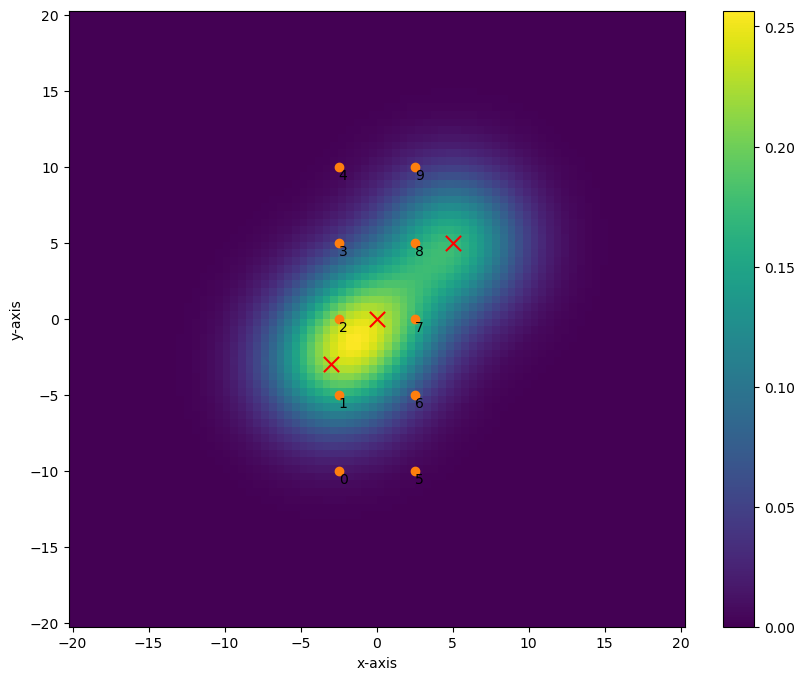

In [18]:
# define a canvas
canvas = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=80,
    npoints_y=80,
)

# define a base density as a sum of Gaussians
canvas.set_density_from_gaussians(
    centers = np.array([[0,0], [5,5], [-3,-3]]),
    amplitude = 10,
    variance = 10,
)

# define a small rectangular lattice (to make calculations faster)
lattice = Lattice.rectangular(2, 5, 5)
canvas.set_lattice(lattice)
canvas.draw(draw_centers=True, draw_lattice=True)

In [19]:
# now decide the order of the Lp norm and the parameters of the test Gaussian mixture
mixture_parameters = [15, 15]   # test amplitude and variance
p = 2   # order of the Lp norm

# calculate the coefficients
canvas.calculate_pubo_coefficients(p, mixture_parameters)

In [20]:
# the coefficients are stored, together with the mixture parameters and the Lp order, in a dictionary
for key, val in canvas._pubo.items():
    print(key, "=", val)

coeffs = {1: {(0,): 0.23925618218828149, (1,): -1.6253461400808518, (2,): -2.3941536151941394, (3,): -0.9527434556932808, (4,): 0.5116458916909374, (5,): 0.5415149898078783, (6,): -0.9941265072816896, (7,): -2.3259244979817124, (8,): -1.7592101963043805, (9,): -0.09003315168470527}, 2: {(0, 1): 1.53471907075864, (0, 2): 0.4397050540152706, (0, 3): 0.054749643057432296, (0, 4): 0.0029627093853181706, (0, 5): 1.5345853568773724, (0, 6): 1.0117491674303716, (0, 7): 0.2898714369236114, (0, 8): 0.03609318919395809, (0, 9): 0.001953138402360556, (1, 2): 1.534721457295138, (1, 3): 0.4397050593779221, (1, 4): 0.054749643057432296, (1, 5): 1.0117491674303716, (1, 6): 1.5347214387075105, (1, 7): 1.0117507407321964, (1, 8): 0.2898714404588891, (1, 9): 0.03609318919395809, (2, 3): 1.534721457295138, (2, 4): 0.4397050540152706, (2, 5): 0.2898714369236114, (2, 6): 1.0117507407321966, (2, 7): 1.534721457425003, (2, 8): 1.0117507407321966, (2, 9): 0.28987143692361134, (3, 4): 1.53471907075864, (3, 5):

In [21]:
# to see them better, print the coefficients out order by order
for i in range(1, p+1):
    print(f"Coefficients of order {i}:")
    print(canvas._pubo["coeffs"][i])
    print()

Coefficients of order 1:
{(0,): 0.23925618218828149, (1,): -1.6253461400808518, (2,): -2.3941536151941394, (3,): -0.9527434556932808, (4,): 0.5116458916909374, (5,): 0.5415149898078783, (6,): -0.9941265072816896, (7,): -2.3259244979817124, (8,): -1.7592101963043805, (9,): -0.09003315168470527}

Coefficients of order 2:
{(0, 1): 1.53471907075864, (0, 2): 0.4397050540152706, (0, 3): 0.054749643057432296, (0, 4): 0.0029627093853181706, (0, 5): 1.5345853568773724, (0, 6): 1.0117491674303716, (0, 7): 0.2898714369236114, (0, 8): 0.03609318919395809, (0, 9): 0.001953138402360556, (1, 2): 1.534721457295138, (1, 3): 0.4397050593779221, (1, 4): 0.054749643057432296, (1, 5): 1.0117491674303716, (1, 6): 1.5347214387075105, (1, 7): 1.0117507407321964, (1, 8): 0.2898714404588891, (1, 9): 0.03609318919395809, (2, 3): 1.534721457295138, (2, 4): 0.4397050540152706, (2, 5): 0.2898714369236114, (2, 6): 1.0117507407321966, (2, 7): 1.534721457425003, (2, 8): 1.0117507407321966, (2, 9): 0.28987143692361134,

In [22]:
# focus on the coefficients of order 2
# they are a dictionary where the key is of the type (i,j) and the value is a number
# this gives you the interaction strength between lattice point i and j
for pair, strength in canvas._pubo["coeffs"][2].items():
    print(f"interacting lattice points: {pair}      interaction strength: {strength}")

interacting lattice points: (0, 1)      interaction strength: 1.53471907075864
interacting lattice points: (0, 2)      interaction strength: 0.4397050540152706
interacting lattice points: (0, 3)      interaction strength: 0.054749643057432296
interacting lattice points: (0, 4)      interaction strength: 0.0029627093853181706
interacting lattice points: (0, 5)      interaction strength: 1.5345853568773724
interacting lattice points: (0, 6)      interaction strength: 1.0117491674303716
interacting lattice points: (0, 7)      interaction strength: 0.2898714369236114
interacting lattice points: (0, 8)      interaction strength: 0.03609318919395809
interacting lattice points: (0, 9)      interaction strength: 0.001953138402360556
interacting lattice points: (1, 2)      interaction strength: 1.534721457295138
interacting lattice points: (1, 3)      interaction strength: 0.4397050593779221
interacting lattice points: (1, 4)      interaction strength: 0.054749643057432296
interacting lattice p

## Decimating lattices

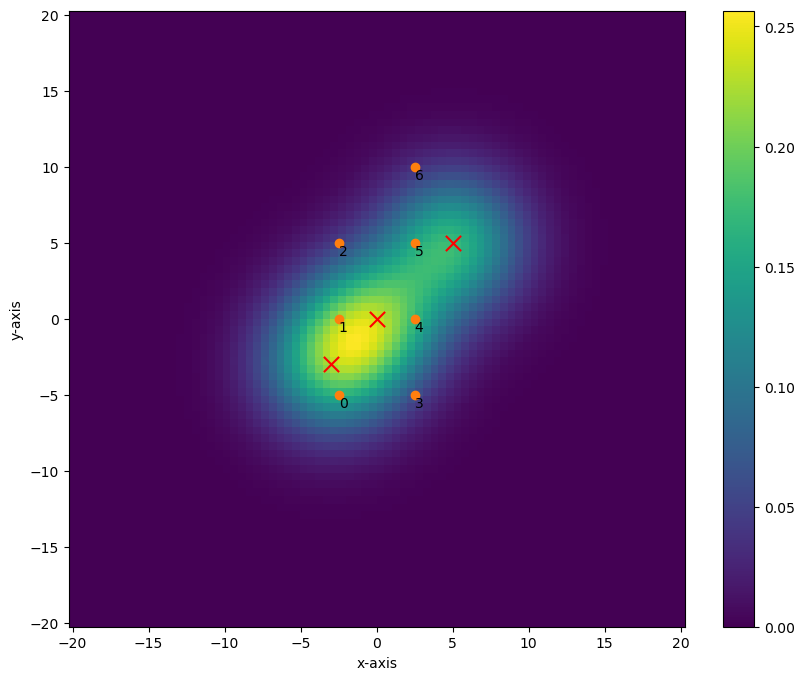

In [23]:
# Notice that in a QUBO problem the variables associated with a positive linear coefficient
# will never contribute to the solution, so they can be discarder.
# Therefore, once the QUBO coefficients are calculated, we can call a function to decimate the lattice
# based on the sign of the linear coefficient

canvas.decimate_lattice()
canvas.draw(draw_centers=True, draw_lattice=True)

In [24]:
# After decimation, the QUBO coefficients are updated accordingly
for i in range(1, p+1):
    print(f"Coefficients of order {i}:")
    print(canvas._pubo["coeffs"][i])
    print()

Coefficients of order 1:
{(0,): -1.6253461400808518, (1,): -2.3941536151941394, (2,): -0.9527434556932808, (3,): -0.9941265072816896, (4,): -2.3259244979817124, (5,): -1.7592101963043805, (6,): -0.09003315168470527}

Coefficients of order 2:
{(0, 1): 1.534721457295138, (0, 2): 0.4397050593779221, (0, 3): 1.5347214387075105, (0, 4): 1.0117507407321964, (0, 5): 0.2898714404588891, (0, 6): 0.03609318919395809, (1, 2): 1.534721457295138, (1, 3): 1.0117507407321966, (1, 4): 1.534721457425003, (1, 5): 1.0117507407321966, (1, 6): 0.28987143692361134, (2, 3): 0.2898714404588891, (2, 4): 1.0117507407321966, (2, 5): 1.5347214387075108, (2, 6): 1.0117491674303714, (3, 4): 1.534721457295138, (3, 5): 0.43970505937792204, (3, 6): 0.05474964305743229, (4, 5): 1.5347214572951378, (4, 6): 0.43970505401527055, (5, 6): 1.53471907075864}



## Evaluating cost of bitstrings

In [25]:
# once coefficients are calculated, it is possible to efficiently evaluate the cost of a bitstring

# calculate QUBO coefficients
p=2
canvas.calculate_pubo_coefficients(p, mixture_parameters)

# calculate cost of random bitstrings
bitstrings = ["1010110", "0100100", "1011000"]
for bs in bitstrings:
    print(f"cost of {bs}:", canvas.calculate_bitstring_cost_from_coefficients(bs))


cost of 1010110: -0.8407034127563728
cost of 0100100: -3.185356655750849
cost of 1011000: -1.3079181645115003


# Example of workflow

1) The user starts with a 3D-RISM density slice. Let's create a fake one with Gaussians

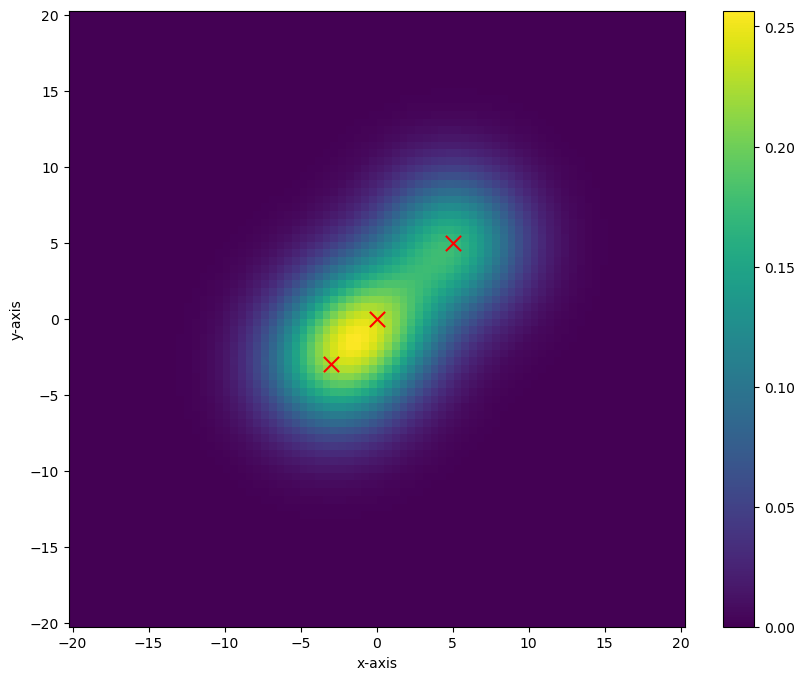

In [26]:
# define a canvas
canvas = DensityCanvas(
    origin=(-20,-20),
    length_x=40,
    length_y=40,
    npoints_x=80,
    npoints_y=80,
)

# define a base density as a sum of Gaussians
canvas.set_density_from_gaussians(
    centers = np.array([[0,0], [5,5], [-3,-3]]),
    amplitude = 10,
    variance = 10,
)

canvas.draw(draw_centers=True)

2) The user defines a lattice on top of the density

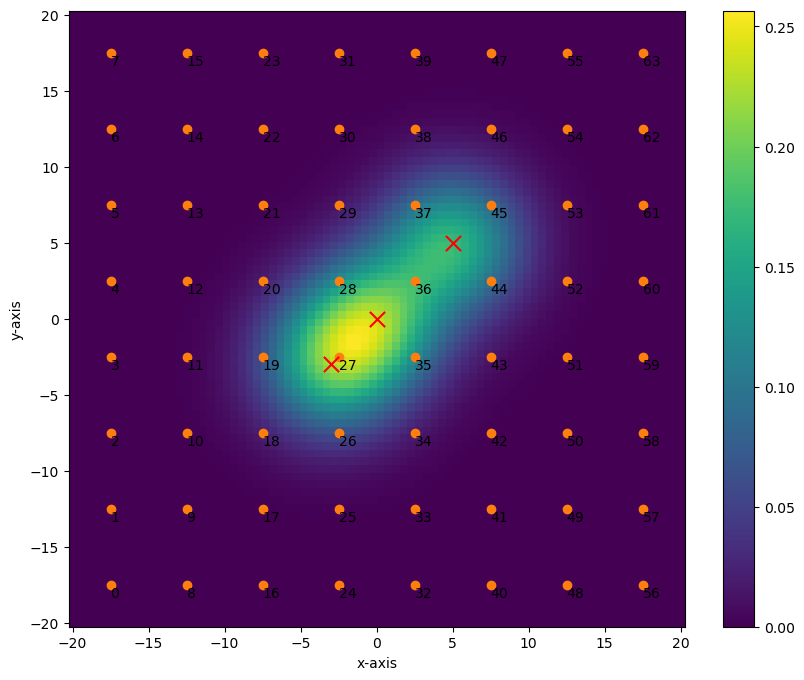

In [27]:
# define a rectangular lattice
canvas.set_rectangular_lattice(8, 8, 5)
canvas.draw(draw_centers=True, draw_lattice=True)

3) The user calculates the QUBO coefficients and decimates the number of lattice points based on the sign of the associated linear coefficient
(if sign is positive, that point can be discarded)

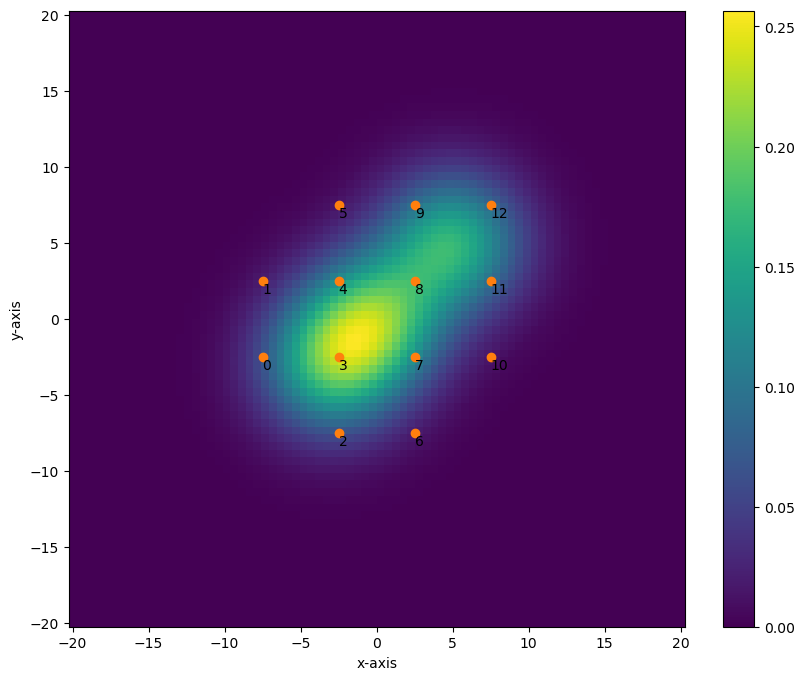

In [28]:
p = 2
mixture_parameters = [15, 15]

canvas.calculate_pubo_coefficients(p=p, params=mixture_parameters)

canvas.decimate_lattice()
canvas.draw(draw_lattice=True)

4) The linear coefficients are mapped to detunings on the QPU

In [29]:
# placeholder function that maps linear coefficients to detunings
def some_mapping(gammas):
    return 10*np.array(gammas)

linear_coeffs = canvas.get_linear_coefficients()
detunings = some_mapping(linear_coeffs)
print(detunings)

[ -6.32140097  -1.20123582  -6.32140097 -23.26616958 -18.31972837
  -1.07482013  -1.20123582 -18.31972837 -22.92253616  -9.32158327
  -1.07482013  -9.32158327  -5.05378563]
